# SPMe-Model

## About

- authors:
    - Scott J. Moura
    - Federico Bribiesca Argomedo
    - Reinhardt Klein
    - Anahita Mirtabatabaei
    - Miroslav Krstic
- id:
    `doi: 10.1109/TCST.2016.2571663`
- tags:
    - micro
    - meso
    - spm
    - electrolyte
- sources:
    - [paper](https://ieeexplore.ieee.org/document/7489035)
    - [model parameter](https://ieeexplore.ieee.org/document/8952455)

This paper combines the single particle model with electrolyte (SPMe) dynamics.

# Setup

This notebooks requires the following packages:
- [diffeq](https://pypi.org/project/diffeqpy/) - optional for more differential equation solvers (for more details see the [other solvers](#(optional)-other-solvers) section)
- [matplotlib](https://pypi.org/project/matplotlib/) - plotting of the results
- [numpy](https://pypi.org/project/numpy/) - required for all the numerical operations
- [scikit-fem](https://pypi.org/project/scikit-fem/) - compute simple FEM 
- [scipy](https://pypi.org/project/scipy/) - solves the differential equation
- [polars](https://pypi.org/project/polars/) - stores and read the date from a ``.json``-file (theoretically not required)


All dependecies can be automatically be installed, if:
````python
automated_setup = True
````

**Note:** that the notebook will install the required packages for a ``python 3.10`` kernel.
But the code can simply be adapted to other kernels.

In [1]:
automated_setup = False
latex_plots = True
save_results = True
use_julia = False

optional_content = {
    "radial_diffusion": True,
    "spacial_diffusion": True
}

from pathlib import Path

result_path = Path.cwd() / "sol_spme"
if not result_path.exists():
    result_path.mkdir()

### Automated Install

make sure the Python-Version is correct

In [2]:
import sys
print(sys.version)

3.10.12 (main, Jun  8 2023, 00:00:00) [GCC 13.1.1 20230511 (Red Hat 13.1.1-2)]


In [3]:
%%capture
if automated_setup:
    ! python3.10 -m pip install --upgrade pip
    ! python3.10 -m pip install numpy
    ! python3.10 -m pip install matplotlib
    ! python3.10 -m pip install scipy
    ! python3.10 -m pip install scikit-fem
    ! python3.10 -m pip install polars

## Plots

In [4]:
import matplotlib.pyplot as plt

plt.get_backend()

'module://matplotlib_inline.backend_inline'

In [5]:
%matplotlib inline

In [6]:
import matplotlib

fig = plt.figure()
plt.figure().clear()
plt.close()
plt.cla()
plt.clf()

def plot_setup():
    if latex_plots:
        matplotlib.use("pgf")
        matplotlib.rcParams.update({
            "pgf.texsystem": "pdflatex",
            'text.usetex': True,
            'pgf.rcfonts': False,
        })
    else:
        matplotlib.rcParams.update(matplotlib.rcParamsDefault)

plot_setup()

In [7]:
from matplotlib import pyplot


def save_plot(plt: pyplot, name:str, suffix:str=None):
    if save_results:
        if suffix is None:
            if latex_plots:
                suffix = '.pgf'
            else:
                suffix = '.png'
        plt.savefig(result_path / (name + suffix))

In [8]:
dark_plots={
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    
    "axes.linewidth": 1.5,
    "axes.facecolor": "black",

    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",

    # grid
    "axes.grid": True,
    "grid.color": "grey",
    "grid.linestyle": "dashed",
    
    # legend
    "legend.fancybox": False,
    "legend.edgecolor": "white",
    "legend.labelcolor": "white",
    "legend.framealpha": 0.8,
    
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black",
    "savefig.transparent": True,
}

In [9]:
plot_config = dark_plots

# Simulation

## Open-Circuit Potential

The values were taken from:
```yaml
title: Global Sensitivity Analysis of the Single Particle Lithium-Ion Battery Model with Electrolyte
authors: Grandjean et al.
doi: 10.1109/VPPC46532.2019.8952455
```

In [10]:
import numpy as np
from uocps import U_ocp

num_x = 1000
x = np.linspace(0.+1/num_x, 1.0-1/num_x, num_x)
U_ocp_MCMB = U_ocp("MCMB", x)
U_ocp_NMC  = U_ocp("NMC", x)
U_ocp_LMO  = U_ocp("LMO", x)
U_ocp_LFP  = U_ocp("LFP", x)

### (Optional) Optical Comparison of different U_ocp's

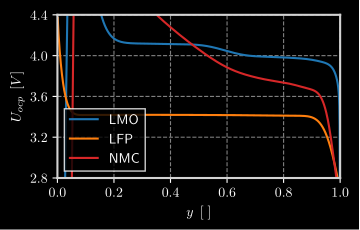

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from helpers import set_size


plt.rcParams.update(plot_config)

fig,ax = plt.subplots(figsize=set_size(245))

ax.plot(x, U_ocp_LMO, label="LMO")
ax.plot(x, U_ocp_LFP, label="LFP")
ax.plot(x, U_ocp_NMC, label="NMC", color="#d62728")

# ax.xaxis.grid(which='both', linestyle='dashed') #  color='gray',
#ax.yaxis.grid(color='gray', linestyle='dashed')

ax.set_xlabel(r"$y \; \left[ \; \right]$")
ax.set_ylabel(r"$U_{ocp} \; \left[ V \right]$")
ax.legend(loc='lower left')


x_min = 0.0
x_max = 1.0
dx = x_max - x_min

minor_locator = AutoMinorLocator(1)
ax.xaxis.set_minor_locator(minor_locator)
ax.set_xticks(np.arange(x_min, x_max + 0.2,0.2))
ax.set_xlim([x_min, x_max])

y_min = 2.8
y_max = 4.4
dy = y_max - y_min
ax.set_yticks(np.arange(y_min, y_max + 0.4, 0.4))
ax.set_ylim([y_min, y_max])

# This should be called after all axes have been added
fig.tight_layout(pad=0)

save_plot(plt, 'spme_Uocp(y)')
fig

## Parameters

The values were taken from:
```yaml
title: Global Sensitivity Analysis of the Single Particle Lithium-Ion Battery Model with Electrolyte
authors: Grandjean et al.
doi: 10.1109/VPPC46532.2019.8952455
```

In [12]:
from uocps import U_ocp
# fixed values
alpha = 0.5
kappa = 0.95
F_const = 96485.33289
gas_const = 8.314472
V_max = 4.115
V_min = 2.5

Temp = 298.15 # K

ano = {
    "L": 22 * 10e-6, # um -> m
    "Rf": 0, # Ohm/m2
    "Rs": 11.5 * 10e-6, # um -> m
    "eps_s": 0.635,
    "eps_e": 0.295,
    "D": 0.1 *10e-12, # um2/s -> m2/s
    "k": 5 *1e-6, 
    "c_max": 31389, # mol/m3
    "c_ini": 28320, # mol/m3
}

sep = {
    "L": 20 * 10e-6, # um -> m
    "eps_e": 0.44,
}

cat = {
    "L": 35 * 10e-6, # um -> m
    "Rf": 0, # Ohm/m2
    "Rs": 14.5 * 10e-6, # um -> m
    "eps_s": 0.476,
    "eps_e": 0.443,
    "D": 0.8 *10e-12, # um2/s -> m2/s
    "k": 7 *1e-6, 
    "c_max": 36292, # mol/m3
    "c_ini": 3153, # mol/m3
}

ele = {
    "D": 278.8 * 10e-12, # um2/s -> m2/s
    "c_ini": 1000,  # mol/m3
    "b": 1.5,
    "trans": 0.363,
}

ano["a"] = 3*ano["eps_s"] / ano["Rs"]
cat["a"] = 3*cat["eps_s"] / cat["Rs"]

ano["U"] = lambda c: U_ocp("hard_carbon", c/ano["c_max"], Temp)
cat["U"] = lambda c: U_ocp("LFP", c/cat["c_max"], Temp)

stack = [ano, sep, cat]


## Applied Current

In [13]:
import numpy as np
c_rate = 1
t_charge = 1/c_rate * 3600 # h -> s
t_rest = 0.5 * 3600 # h -> s
capacity = min(ano["c_ini"]*ano["L"]*ano["eps_s"], cat["c_ini"]*cat["L"]*ano["eps_s"]) * F_const # [As] or [C] (both are the same) TODO formula check with Johannes
print(f"capacity for {capacity/3600} Ah/m^2")
i_change = capacity / t_charge
t_mod = 0.3 # only slight charge and endcharge
t_change = t_charge * t_mod
print(f"charge for {t_charge} s")
t_cycle = t_change + t_rest + t_change + t_rest
t_end = 1 * t_cycle
print(f"simulation time {t_end} s")


def i_app(t):
    t_rel = t % t_cycle
    if t_rel < t_change: # discharge
        return i_change # discharge is positive!
    elif t_rel < t_change + t_rest: # rest
        return 0
    elif t_rel < t_change + t_rest + t_change: # charge
        return -1.0 * i_change
    elif t_rel < t_cycle: # rest
        return 0

capacity for 18.78125196814786 Ah/m^2
charge for 3600.0 s
simulation time 5760.0 s


### (Optional) Plot of Applied Current

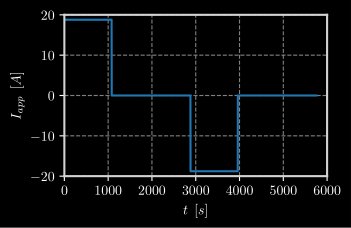

In [14]:
import numpy as np

ts = np.arange(0, int(t_end), 1)
i_apps = np.zeros(len(ts))
for i in range(len(ts)):
    i_apps[i] = i_app(ts[i])

import matplotlib.pyplot as plt
from helpers import set_size

plt.rcParams.update(plot_config)
fig,ax = plt.subplots(figsize=set_size(245))
ax.plot(ts, i_apps)

ax.set_xlabel(r"$t \; \left[ s \right]$")
ax.set_ylabel(r"$I_{app} \; \left[ A \right]$")


ax.set_xlim([np.floor(np.min(ts)/1000)*1000, np.ceil(np.max(ts)/1000)*1000])
ax.set_ylim([np.floor(np.min(i_apps)/10)*10, np.ceil(np.max(i_apps)/10)*10])

save_plot(plt, 'spme_Iapp(t)')
fig

## Model

This model was taken from:
```yaml
title: Battery State Estimation for a Single Particle Model With Electrolyte Dynamics
authors: Moura et al.
doi: 10.1109/TCST.2016.2571663
```

### Radial Diffusion

The equation for the Lithium-transport inside the electrode materials is:
$$\frac{\partial c_{s}^{\pm}}{\partial t}(x,r,t) = \frac{1}{r^2} \frac{\partial}{ \partial r} \left[ D_s^\pm r^2 \frac{\partial c_s^\pm}{\partial r}(x,r,t)\right]$$
with the boundary conditions:
$$\frac{\partial c_{s}^{\pm}}{\partial r}(x,0,t) = 0$$
$$\frac{\partial c_{s}^{\pm}}{\partial r}(x,R_{s}^{\pm},t) = -\frac{1}{ D_s^\pm} j_{n}^{\pm}(x,t)$$
and
$$j_{n}^{\pm}(t) = \mp \frac{I(t)}{F a^{\pm} L^{\pm}}$$

Under certain assumptions the equations can be simplified to:
$$\frac{\partial c_{s}^{\pm}}{\partial t}(r,t) = \frac{1}{r^2} \frac{\partial}{ \partial r} \left[ D_s^\pm r^2 \frac{\partial c_s^\pm}{\partial r}(r,t)\right]$$
with the boundary conditions:
$$\frac{\partial c_{s}^{\pm}}{\partial r}(0,t) = 0$$
$$\frac{\partial c_{s}^{\pm}}{\partial r}(R_{s}^{\pm},t) = -\frac{1}{D_s^\pm} j_{n}^{\pm}(t) = \pm \frac{1}{ D_s^\pm F a^{\pm} L^{\pm}} I(t)$$

#### Simplification

$1/r^2$ is not defined for $r=0$.
A workaround is to multiply with $r^2$
$$r^2 \frac{\partial c_{s}^{\pm}}{\partial t}(r,t) =  \frac{\partial}{ \partial r} \left[D_s^\pm r^2 \frac{\partial c_s^\pm}{\partial r}(r,t)\right]$$

Further, to avoid recomputing the matrices for every component, the spacial coordinate can be normalized:

$r = y \; R_s^{\pm}$ with $y \in [0,1]$
and
$\frac{\partial}{\partial r} \left( \cdot \right) 
= \frac{1}{R_{s}^{\pm}} \frac{\partial}{\partial y} 
\left( \cdot \right).$

$$
y^2 \; (R_{s}^{\pm})^2 \frac{\partial c_{s}^{\pm}}{\partial t}(y,t) 
= \frac{1}{R_{s}^{\pm}} \frac{\partial}{ \partial y} 
\left[
    D_s^\pm
    \frac{y^2 (R_{s}^{\pm})^2}{R_{s}^{\pm}} \frac{\partial c_s^\pm}{\partial y}(y,t)
\right]
$$
$$
y^2 R_{s}^{\pm} \frac{\partial c_{s}^{\pm}}{\partial t}(y,t) 
= \frac{1}{(R_{s}^{\pm})^2} \frac{\partial}{ \partial y} 
\left[
    D_s^\pm
    \frac{y^2 (R_{s}^{\pm})^2}{R_{s}^{\pm}} \frac{\partial c_s^\pm}{\partial y}(y,t)
\right]
$$
$$
y^2 R_{s}^{\pm} \frac{\partial c_{s}^{\pm}}{\partial t}(y,t) 
= \frac{\partial}{ \partial y} 
\left[
    D_s^\pm
    \frac{y^2 (R_{s}^{\pm})^2}{(R_{s}^{\pm})^3} \frac{\partial c_s^\pm}{\partial y}(y,t)
\right]
$$
$$
y^2 R_{s}^{\pm} \frac{\partial c_{s}^{\pm}}{\partial t}(y,t) 
= \frac{\partial}{ \partial y} 
\left[
    D_s^\pm
    \frac{y^2}{R_{s}^{\pm}} \frac{\partial c_s^\pm}{\partial y}(y,t)
\right]
$$
and with the boundary conditions:
$$\frac{\partial c_{s}^{\pm}}{\partial y}(0,t) = 0$$
$$\frac{\partial c_{s}^{\pm}}{\partial y}(1,t) = \pm \frac{R_{s}^{\pm}}{ D_s^\pm F a^{\pm} L^{\pm}} I(t)$$



#### Derive FEM-Formulation

multiply with the test function $v$
$$
y^2 R_{s}^{\pm} \frac{\partial c_{s}^{\pm}}{\partial t}(y,t) \cdot v
= \frac{\partial}{ \partial y} 
\left[
    D_s^\pm
    \frac{y^2}{R_{s}^{\pm}} \frac{\partial c_s^\pm}{\partial y}(y,t)
\right] \cdot v
$$

integration by parts:
$$
\begin{align*}
\int_0^1
y^2 R_{s}^{\pm} 
\frac{\partial c_{s}^{\pm}}{\partial t}(y,t) \cdot v 
dy
&= 
\left[
    D_s^\pm
    \frac{y^2}{R_{s}^{\pm}} \frac{\partial c_s^\pm}{\partial y}(y,t) \cdot v
\right]_{y=0}^{y=1}
\\
&-
\int_0^1
    D_s^\pm
    \frac{y^2}{R_{s}^{\pm}} \frac{\partial c_s^\pm}{\partial y}(y,t)
    \cdot \frac{\partial v}{ \partial y}
dy
\end{align*}
$$

insert boundary condition:
$$
\begin{align*}
\int_0^1
y^2 R_{s}^{\pm} 
\frac{\partial c_{s}^{\pm}}{\partial t}(y,t) \cdot v
dy
&= \pm
    D_s^\pm
    \frac{1^2}{R_{s}^{\pm}} 
    \frac{R_{s}^{\pm}}{ D_s^\pm F a^{\pm} L^{\pm}} I(t) \cdot v(y=1)
\\
&-
\int_0^1
    D_s^\pm
    \frac{y^2}{R_{s}^{\pm}} \frac{\partial c_s^\pm}{\partial y}(y,t)
    \cdot \frac{\partial v}{ \partial y}
dy
\end{align*}
$$

$$
\begin{align*}
\int_0^1
y^2 R_{s}^{\pm} 
\frac{\partial c_{s}^{\pm}}{\partial t}(y,t) \cdot v
dy
&= \pm
    \frac{1}{F a^{\pm} L^{\pm}} I(t) \cdot v(y=1)
\\
&-
\int_0^1
    D_s^\pm
    \frac{y^2}{R_{s}^{\pm}} \frac{\partial c_s^\pm}{\partial y}(y,t)
    \cdot \frac{\partial v}{ \partial y}
dy
\end{align*}
$$

Some rearranging and all integrals are material independent:
$$
\begin{align*}
R_{s}^{\pm} 
\int_0^1
y^2
\frac{\partial c_{s}^{\pm}}{\partial t}(y,t) \cdot v
dy
&= \pm
    \frac{1}{F a^{\pm} L^{\pm}} I(t) \cdot v(y=1)
\\
&-
\frac{D_s^\pm}{R_{s}^{\pm}}
\int_0^1
    y^2 \frac{\partial c_s^\pm}{\partial y}(y,t)
    \cdot \frac{\partial v}{ \partial y}
dy
\end{align*}
$$

#### Implementation

In [15]:
from skfem import MeshLine, Basis, ElementLineP1, BilinearForm, LinearForm
from skfem.helpers import dot, grad
import numpy as np

n_s = 5 + 1 # nodes in solid

space = np.linspace(0, 1, n_s)
# particle mesh
mesh_s = MeshLine(space).with_boundaries(
    {"inner": lambda xi: xi[0] == 0, "surface": lambda xi: xi[0] == 1.0}
)

basis_s = Basis(mesh_s, ElementLineP1())  # ElementLineHermite
basis_s_surf = basis_s.boundary("surface")

@BilinearForm
def dt_r(dc, v, w):
    r = w.x[0]
    return r**2 * dc * v #  * r_0**2/(2D)

@BilinearForm
def diff(c, v, w):
    r = w.x[0]
    return r**2 * dot(grad(c), grad(v))

@LinearForm
def bc_n(v, w):
    return dot(w.n, v)

Mass_r = dt_r.assemble(basis_s)
Diff_r = diff.assemble(basis_s)
BC_r = bc_n.assemble(basis_s_surf)

def get_surf(conc) -> float:
    return conc[basis_s.get_dofs("surface")][0]

#### Form of Equations

$$
\begin{align*}
R_{s}^{\pm} 
M.\frac{\partial c}{\partial t}
&= \pm
    \frac{1}{F a^{\pm} L^{\pm}} I(t) \cdot bc
&-
\frac{D_s^\pm}{R_{s}^{\pm}}
D.c
\end{align*}
$$

$$
\begin{align*}
\frac{\partial c}{\partial t}
= M^{-1}.
\left(
\pm \frac{1}{F a^{\pm} L^{\pm}} I(t) \cdot bc
-
\frac{D_s^\pm}{R_{s}^{\pm}}
D.c
\right)
/R_{s}^{\pm} 
\end{align*}
$$


$$
\begin{align*}
0
&= \pm
    \frac{1}{F a^{\pm} L^{\pm}} I(t) \cdot bc
&-
\frac{D_s^\pm}{R_{s}^{\pm}}
D.c
- R_{s}^{\pm} 
M.\frac{\partial c}{\partial t}
\end{align*}
$$


In [16]:
Mass_r_inv = np.linalg.pinv(Mass_r.toarray())

def eq_radial_diffusion(u: np.ndarray, t: float, 
                        stack: list[dict], sizes:tuple[int], 
                        offset:int=0, du: np.ndarray = None
                      ) -> np.ndarray:
  rests = np.zeros(0)
  start = offset
  for c in range(2):
    i = int(2*c-1)
    length = start + sizes[c]
    c_s = u[start:length]

    # print(f"{i}:{len(c_s)}/{length}")

    com = stack[i+1]
    j = (i * i_app(t) )/(F_const * com["a"] * com["L"])
    rest = ( 
      - com["D"]/com["Rs"] * Diff_r.dot(c_s)
      + j * BC_r
    )
    if du is None:
      rest = np.matmul(Mass_r_inv, rest) / com["Rs"]
    else:
      dc_s = du[start:length]
      rest = rest - com["Rs"] * Mass_r.dot(dc_s)
    rests = np.concatenate((rests,rest))
    start = length

  # print(f"{len(u)}/{len(rests)}")
  return rests

#### (Optional) Radial Concentration Changes

In [17]:
"""
anode will be discharged
cathode will be charged
"""

# intial values
def ini_ones(x):
    return np.ones((x.shape[1], x.shape[2]))

if not latex_plots and optional_content["radial_diffusion"]:
    import numpy as np
    from scipy.integrate import solve_ivp

    tspan = [0, t_end]
    u0_ano = basis_s.project(ini_ones) * ano["c_ini"]
    u0_cat = basis_s.project(ini_ones) * cat["c_ini"]
    u0 = np.concatenate((u0_ano,u0_cat))
    sizes = [len(u0_ano), len(u0_cat)]

    def spme_radial(t,u):
        radial = eq_radial_diffusion(u, t, stack, sizes)
        return radial
    
    sol_radial = solve_ivp(
        spme_radial,
        tspan,
        u0,
        method="Radau",  # Radau, BDF, LSODA
        # atol=1e-6,
        dense_output=True,
    )

In [18]:
import matplotlib.pyplot as plt
from helpers import set_size, sort_u_by_x

plt.rcParams.update(plot_config)

if not latex_plots and optional_content["radial_diffusion"]:
    ts = np.linspace(0, t_end, 1000)
    c_sols = sol_radial.sol(ts).T
    c_anos = []
    c_cats = []
    i_apps = []
    xs = []
    for i in range(len(ts)):
        c_sol = c_sols[i]
        xs,c_ano = sort_u_by_x(basis_s, c_sol[:sizes[0]])
        _ ,c_cat = sort_u_by_x(basis_s, c_sol[sizes[0]:])
        c_anos.append(c_ano)
        c_cats.append(c_cat)
        i_apps.append(i_app(ts[i]))

    fig,ax = plt.subplots(1,2, figsize=set_size(490))

    line_ano = ax[0].plot(xs, c_anos[0], label=r"$c^-}$")[0]
    line_cat = ax[0].plot(xs, c_cats[0], label=r"$c^+$")[0]
    scat_i = ax[1].scatter(ts[0], i_apps[0])

    # Concentrations
    img = ax[0]
    img.xaxis.grid(which='both', color='gray', linestyle='dashed')
    img.yaxis.grid(color='gray', linestyle='dashed')

    img.set_xlabel(r"$x \; \left[ \; \right]$")
    img.set_ylabel(r"$c_{Li^+} \; \left[ \frac{mol}{m^3} \right]$")
    img.set(xlim=[0, 1], ylim=[np.floor(0.0*ano["c_max"]/5000)*5000, np.ceil(1.01*cat["c_max"]/5000)*5000])

    # applied current
    img = ax[1]
    img.plot(ts, i_apps)
    img.xaxis.grid(which='both', color='gray', linestyle='dashed')
    img.yaxis.grid(color='gray', linestyle='dashed')

    img.set_xlabel(r"$ts \; \left[ s \right]$")
    img.set_ylabel(r"$I_{app} \; \left[ A \right]$")
    img.set_xlim([np.floor(np.min(ts)/1000)*1000, np.ceil(np.max(ts)/1000)*1000])
    img.set_ylim([np.floor(np.min(i_apps)/10)*10, np.ceil(np.max(i_apps)/10)*10])

    fig.tight_layout(pad=0)

In [19]:
if not latex_plots and optional_content["radial_diffusion"]:
    time_scale = 4
    def update(frame):
        frame_id = int(frame * time_scale)
        t = ts[frame_id]
        line_ano.set_ydata(c_anos[frame_id])
        line_cat.set_ydata(c_cats[frame_id])
        scat_i.set_offsets([ts[frame_id], i_apps[frame_id]])
        return line_ano, line_cat,scat_i

    import matplotlib.animation as animation
    ani = animation.FuncAnimation(fig=fig, func=update, frames=int(len(ts)/time_scale), interval=30)
    ani.save(filename=result_path / "spme_radial.mp4", writer="ffmpeg")

In [20]:
from IPython.display import Video
Video(result_path /'spme_radial.mp4')

### Spacial Transportation

The transportation of $\mathrm{Li^+}$ along the battery thickness can be described as:
$$\frac{\partial c_{e}^{j}}{\partial t} = \frac{\partial}{\partial x}\left[\frac{D_{e}^{eff}(c_e^j)}{\varepsilon_e^j} \frac{\partial c_e^j}{\partial x} (x,t)\right]-j\frac{1-t_c^0}{\varepsilon_e^j F L^j} I(t)$$
and $j \in \{-1,0,1\}$
- $-1$: Anode
- $0$: Separator
- $1$: Kathode

In addition, the boundary conditions for this problem are: 
$$\frac{\partial c_e^-}{\partial x} (0^-,t) = \frac{\partial c_e^+}{\partial x} (0^+,t) = 0$$
$$D_e^{-,eff}\frac{\partial c_e^-}{\partial x} (L^-,t) = D_e^{sep,eff} \frac{\partial c_e^{sep}}{\partial x} (0^{sep},t)$$
$$D_e^{sep,eff}\frac{\partial c_e^{sep}}{\partial x} (L^{sep},t) = D_e^{+,eff} \frac{\partial c_e^{+}}{\partial x} (L^{+},t)$$
$$c_e(L^{-},t) = c_e(0^{sep}, t)$$
$$c_e(L^{sep},t) = c_e(L^{+}, t)$$

#### FEM wit normalized x-Coordinate

$x^{j} = y * L^{j}$ with $y \in [0,1]$
$$\frac{\partial}{\partial x} \left( \cdot \right) = \frac{1}{L^{j}} \frac{\partial}{\partial y} \left( \cdot \right) $$

$$\frac{\partial c_{e}^{j}}{\partial t} = \frac{1}{L^j} \frac{\partial}{\partial y}\left[\frac{D_{e}^{eff}(c_e^j)}{\varepsilon_e^j} \frac{1}{L^j}\frac{\partial c_e^j}{\partial y} (y,t)\right]-j\frac{1-t_c^0}{\varepsilon_e^j F L^j} I(t)$$

$$
\int_{j+1}^{j+2} \frac{\partial c}{\partial t} \cdot v dy = \frac{D_{e}^{eff}}{\varepsilon_e^j {L^j}^2}  \left. \frac{\partial c}{\partial y}  \cdot \frac{\partial v}{\partial y}  \right|_{j+1}^{j+2}
- \frac{D_{e}^{eff}}{\varepsilon_e^j {L^j}^2} \int_{j+1}^{j+2} \frac{\partial c}{\partial y}  \cdot \frac{\partial v}{\partial y}  dy 
-j\frac{1-t_c^0}{\varepsilon_e^j F L^j} I(t) \int_{j+1}^{j+2} v dy$$

In [21]:
from skfem import MeshLine, Basis, ElementLineP2, BilinearForm, LinearForm
from skfem.helpers import dot, grad
import numpy as np

n_x = 30 + 1 # nodes in x-Direction

space = np.linspace(0, 3, n_x)
# particle mesh
mesh_x = (MeshLine(space)
          .with_subdomains(
            {
                "ano": lambda xi: xi[0] < 1.0,
                "cat": lambda xi: 2.0 < xi[0],
                "sep": lambda xi: ((1.0 <= xi[0]) & (xi[0] < 2.0))
            }
          )
          .with_boundaries(
            {
                "left": lambda xi: xi[0] == 0, 
                "right": lambda xi: xi[0] == 3.0
            }
          )
        )

basis_x = Basis(mesh_x, ElementLineP2())  # ElementLineHermite
basis_x_ano = Basis(mesh_x, basis_x.elem, elements=mesh_x.subdomains['ano'])
basis_x_cat = Basis(mesh_x, basis_x.elem, elements=mesh_x.subdomains['cat'])
basis_x_sep = Basis(mesh_x, basis_x.elem, elements=mesh_x.subdomains['sep'])

@BilinearForm
def dt_x(dc, v, w):
    return dc * v #  * r_0**2/(2D)

@BilinearForm
def diff(c, v, w):
    return dot(grad(c), grad(v))

@LinearForm
def current(v, w):
    return v

Mass_x = dt_x.assemble(basis_x)

Diff_x_ano = ele["D"] * np.power(ano["eps_e"], ele["b"]) / ano["eps_e"] / np.power(ano["L"],2) * diff.assemble(basis_x_ano)
Diff_x_cat = ele["D"] * np.power(cat["eps_e"], ele["b"]) / cat["eps_e"] / np.power(cat["L"],2) * diff.assemble(basis_x_cat)
Diff_x_sep = ele["D"] * np.power(sep["eps_e"], ele["b"]) / sep["eps_e"] / np.power(sep["L"],2) * diff.assemble(basis_x_sep)
Diff_x = Diff_x_ano + Diff_x_sep + Diff_x_cat

i_ano = (1 - ele["trans"]) / (ano["eps_e"] * F_const * ano["L"]) * current.assemble(basis_x_ano)
i_cat = - 1 * (1 - ele["trans"]) / (cat["eps_e"] * F_const * cat["L"]) * current.assemble(basis_x_cat)
curr = i_ano + i_cat

def get_left(conc) -> float:
    return conc[basis_x.get_dofs("left")][0]

def get_right(conc) -> float:
    return conc[basis_x.get_dofs("right")][0]

#### FEM

In [22]:
from skfem import MeshLine, Basis, ElementLineP2, BilinearForm, LinearForm
from skfem.helpers import dot, grad
import numpy as np

n_x = 30 + 1 # nodes in x-Direction

l_ano = ano["L"]
l_sep = sep["L"]
l_cat = cat["L"]
l_sum = l_ano + l_sep + l_cat
space = np.linspace(0, l_sum, n_x)
# particle mesh
mesh_x = (MeshLine(space)
          .with_subdomains(
            {
                "ano": lambda xi: xi[0] < l_ano,
                "cat": lambda xi: (l_ano + l_sep) < xi[0],
                "sep": lambda xi: ((l_ano < xi[0]) & (xi[0] < (l_ano + l_sep)))
            }
          )
          .with_boundaries(
            {
                "left": lambda xi: xi[0] == 0, 
                "right": lambda xi: xi[0] == l_sum
            }
          )
        )

basis_x = Basis(mesh_x, ElementLineP2())  # ElementLineHermite
basis_x_ano = Basis(mesh_x, basis_x.elem, elements=mesh_x.subdomains['ano'])
basis_x_cat = Basis(mesh_x, basis_x.elem, elements=mesh_x.subdomains['cat'])
basis_x_sep = Basis(mesh_x, basis_x.elem, elements=mesh_x.subdomains['sep'])

@BilinearForm
def dt_x(dc, v, w):
    return dc * v

@BilinearForm
def diff(c, v, w):
    return dot(grad(c), grad(v))

@LinearForm
def current(v, w):
    return v

Mass_x = dt_x.assemble(basis_x)

Diff_x_ano = ele["D"] * np.power(ano["eps_e"], ele["b"]) / ano["eps_e"] * diff.assemble(basis_x_ano)
Diff_x_cat = ele["D"] * np.power(cat["eps_e"], ele["b"]) / cat["eps_e"] * diff.assemble(basis_x_cat)
Diff_x_sep = ele["D"] * np.power(sep["eps_e"], ele["b"]) / sep["eps_e"] * diff.assemble(basis_x_sep)
Diff_x = Diff_x_ano + Diff_x_sep + Diff_x_cat

i_ano = - 1 * (1 - ele["trans"]) / (ano["eps_e"] * F_const * ano["L"]) * current.assemble(basis_x_ano)
i_cat =       (1 - ele["trans"]) / (cat["eps_e"] * F_const * cat["L"]) * current.assemble(basis_x_cat)
curr = i_ano + i_cat

def get_left(conc) -> float:
    return conc[basis_x.get_dofs("left")][0]

def get_right(conc) -> float:
    return conc[basis_x.get_dofs("right")][0]

#### Form of the Equation

In [23]:
Mass_x_inv = np.linalg.pinv(Mass_x.toarray())
def eq_spacial_transportation(u: np.ndarray, t:float, 
                              size:int=-1, offset:int=0, 
                              du: np.ndarray = None
                            ) -> np.ndarray:
  if size == -1:
    c_e = u[offset:]
  else:
    c_e = u[offset:(offset+size)]
  rest =  -Diff_x.dot(c_e) - curr * i_app(t)
  if du is None:
    rest = np.matmul(Mass_x_inv, rest)
  else:
    dc_e = du[offset:]
    rest = rest - Mass_x.dot(dc_e)
  return rest

#### (Optional) Spacial Concentration Change

In [24]:
"""
anode will be discharged
cathode will be charged
"""

# intial values
def ini_ones(x):
    return np.ones((x.shape[1], x.shape[2]))

if optional_content["spacial_diffusion"]:
    import numpy as np
    from scipy.integrate import solve_ivp

    tspan = [0, t_end]
    u0_e = basis_x.project(ini_ones) * ele["c_ini"]
    u0 = u0_e

    def spme_spacial(t,u):
        spacial = eq_spacial_transportation(u, t)
        return spacial
    
    sol_spacial = solve_ivp(
        spme_spacial,
        tspan,
        u0,
        method="Radau",  # Radau, BDF, LSODA
        # atol=1e-6,
        max_step=10.0,
        dense_output=True,
    )

In [25]:
from helpers import sort_u_by_x

if optional_content["spacial_diffusion"]:
    ts = np.linspace(0, t_end, 1000)
    c_sols = sol_spacial.sol(ts).T
    c_es = []
    c_eanos = []
    c_ecats = []
    i_apps = []
    xs = []
    for i in range(len(ts)):
        xs,c_e = sort_u_by_x(basis_x, c_sols[i])
        c_es.append(c_e)

        c_eanos.append(c_e[0])
        c_ecats.append(c_e[-1])
        
        i_apps.append(i_app(ts[i]))


In [26]:
import matplotlib.pyplot as plt
from helpers import set_size

plt.rcParams.update(plot_config)

if optional_content["spacial_diffusion"]:
    fig,ax = plt.subplots(2,1, figsize=set_size(490))

    ax[0].plot(ts, c_eanos, label=r"$c_{cathode}$")
    ax[0].plot(ts, c_ecats, label=r"$c_{anode}$")

    # electrolyte concentrations at cathode and anode boundary
    img = ax[0]
    img.set_xlim([np.floor(np.min(ts)/1000)*1000, np.ceil(np.max(ts)/1000)*1000])

    img.set_xlabel(r"$t \; \left[ s \right]$")
    img.set_ylabel(r"$c_{Li^+} \; \left[ \frac{mol}{m^3} \right]$")

    # applied current over time
    img = ax[1]
    img.plot(ts, i_apps)
    img.set_xlim([np.floor(np.min(ts)/1000)*1000, np.ceil(np.max(ts)/1000)*1000])
    img.set_ylim([np.floor(np.min(i_apps)/10)*10, np.ceil(np.max(i_apps)/10)*10])

    img.set_xlabel(r"$t \; \left[ s \right]$")
    img.set_ylabel(r"$I_{app} \; \left[ A \right]$")

    fig.tight_layout(pad=0)

    save_plot(plt, 'spme_c(t)&Iapp(t)')
    fig

In [27]:
import matplotlib.pyplot as plt
from helpers import set_size
import numpy as np

plt.rcParams.update(plot_config)
#plt.subplots_adjust(bottom=0.1, left=1.0, right=0.8, top=0.9)

if not latex_plots and optional_content["spacial_diffusion"]:
    fig,ax = plt.subplots(1,2, figsize=set_size(490))

    line_ce = ax[0].plot(xs, c_es[0], label=r"$c_e$")[0]
    scat_i = ax[1].scatter(ts[0], i_apps[0])

    # Concentrations
    img = ax[0]

    img.set_xlabel(r"$x \; \left[ mm \right]$")
    img.set_ylabel(r"$c_{Li^+} \; \left[ \frac{mol}{m^3} \right]$")
    xlocs = np.array([stack[0]["L"], stack[0]["L"] + stack[1]["L"]])
    img.set_xticks(xlocs, np.round(xlocs*1e3,2))
    img.set(xlim=[0, max(xs)], ylim=[0.5*ele["c_ini"], 1.5*ele["c_ini"]])

    # Anode Concentration
    img = ax[1]
    img.plot(ts, i_apps)
    img.set_xlim([np.floor(np.min(ts)/1000)*1000, np.ceil(np.max(ts)/1000)*1000])
    img.set_ylim([np.floor(np.min(i_apps)/10)*10, np.ceil(np.max(i_apps)/10)*10])

    img.set_xlabel(r"$t \; \left[ s \right]$")
    img.set_ylabel(r"$I_{app} \; \left[ A \right]$")

    fig.tight_layout(pad=0)

In [28]:
if not latex_plots and optional_content["spacial_diffusion"]:
    time_scale = 4
    def update(frame):
        frame_id = int(frame * time_scale)
        t = ts[frame_id]
        line_ce.set_ydata(c_es[frame_id])
        scat_i.set_offsets([ts[frame_id], i_apps[frame_id]])
        return line_ce,scat_i

    import matplotlib.animation as animation
    ani = animation.FuncAnimation(fig=fig, func=update, frames=int(len(ts)/time_scale), interval=30)
    ani.save(filename=result_path / "spme_spacial.mp4", writer="ffmpeg")

In [29]:
from IPython.display import Video
Video(result_path / 'spme_spacial.mp4')

### Helpers

In [30]:
def calc_helpers(c_surfs:list[float], c_es:list[np.ndarray], 
                 stack: list[dict], t:float
                ) -> np.ndarray:
  rests = np.zeros(0)
  for c in range(2):
    i = int(2*c-1)
    com = stack[i+1]
    com["j"] = -1*i*i_app(t)/(F_const * com["a"] * com["L"])
    com["i0"] = com["k"] * np.power(c_surfs[c], alpha) * np.power(c_es[c] * (com["c_max"] - c_surfs[c]), alpha)
    com["i0_avg"] = np.mean(com["i0"])
    com["eta"] = (gas_const * Temp)/ (alpha*F_const) * np.arcsinh((-1*i*i_app(t))/(2*com["a"]*com["L"]*com["i0_avg"]))
  return rests

### Voltage

In [31]:
def get_voltage(c_surfs:list[float], c_e: np.ndarray, stack: list[dict], t:float)-> float:
    com_a = stack[0]
    com_s = stack[1]
    com_c = stack[2]
    return (
        com_c["eta"] - com_a["eta"]
        + com_c["U"](c_surfs[1]) - com_a["U"](c_surfs[0]) 
        - ( com_c["Rf"]/(com_c["a"] * com_c["L"]) + com_a["Rf"]/(com_a["a"] * com_a["L"])) * i_app(t)
        + (com_a["L"] + 2*com_s["L"] + com_a["L"]) / (2*kappa) * i_app(t)
        + 2 * gas_const * Temp / F_const * (1-ele["trans"]) * (np.log(get_right(c_e)) - np.log(get_left(c_e)))
            )

### Total SP-Model

In [32]:
import numpy as np


def spme_ode(u, p, t):
    radial = eq_radial_diffusion(u, t, stack, (p[0], p[1]))
    spacial = eq_spacial_transportation(u, t, offset=p[0] + p[1])
    return np.concatenate((radial, spacial))

In [33]:
import numpy as np

def spme_dae(du, u, p, t):
    radial = eq_radial_diffusion(u, t, stack, (p[0], p[1]), du)
    spacial = eq_spacial_transportation(u, t, offset=p[0] + p[1], du=du)
    return np.concatenate((radial, spacial))

### Solving

In [34]:
import numpy as np

# intial values
def ini_ones(x):
    return np.ones((x.shape[1], x.shape[2]))

u0_s_ano = basis_s.project(ini_ones) * ano["c_ini"]
u0_s_cat = basis_s.project(ini_ones) * cat["c_ini"]
u0_e = basis_x.project(ini_ones) * ele["c_ini"]

u0 = np.concatenate((u0_s_ano, u0_s_cat , u0_e))
du0 = np.zeros(len(u0))
differential_vars = [True] * len(du0)

# time
tspan = (0., t_end)


params = [
        len(u0_s_ano), 
        len(u0_s_cat)
    ]

In [35]:
from scipy.integrate import solve_ivp


def spme(t,u):
    return spme_ode(u, params, t)

sol_spme = solve_ivp(
    spme,
    tspan,
    u0,
    method="Radau",  # Radau, BDF, LSODA
    max_step = 10,
    dense_output=True,
)

#### Post Processing

In [36]:
import numpy as np

ts = np.linspace(0, t_end, int(t_end))

us = sol_spme.sol(ts).T

size = len(ts)

Is = np.zeros(size)
Us = np.zeros(size)
c_es = [0]*size
dict_ano={
    "c_surf": np.zeros(size),
    "c_inner": [0]*size,
}
dict_cat={
    "c_surf": np.zeros(size),
    "c_inner": [0]*size,
}

# post processing
for i in range(size):
    t = ts[i]
    Is[i] = i_app(t)
    com_a = stack[0]
    com_s = stack[1]
    com_c = stack[2]
    u = us[i]
    u_start = 0
    u_end = u_start + params[0]
    dict_ano["c_inner"][i] = u[u_start:u_end]
    dict_ano["c_surf"][i] = get_surf(dict_ano["c_inner"][i])

    u_start = u_end
    u_end = u_start + params[1]
    dict_cat["c_inner"][i] = u[u_start:u_end]
    dict_cat["c_surf"][i] = get_surf(dict_cat["c_inner"][i])

    u_start = u_end
    c_es[i] = c_e = u[u_start:]
    
    calc_helpers(
        [dict_ano["c_surf"][i], dict_cat["c_surf"][i]],
        [
            c_e[basis_x_ano.get_dofs()][0], 
            c_e[basis_x_sep.get_dofs()][0], 
            c_e[basis_x_cat.get_dofs()][0]],
        stack, t
    )
    Us[i] = get_voltage([dict_ano["c_surf"][i], dict_cat["c_surf"][i]], c_e, stack, t)

import polars as pl

df = pl.DataFrame({
    "t": ts,
    "I": Is,
    "U": Us,
    "ano.c_surf":  dict_ano["c_surf"],
    "ano.c_inner": dict_ano["c_inner"],
    "cat.c_surf":  dict_cat["c_surf"],
    "cat.c_inner": dict_cat["c_inner"],
    "c_e": c_es
})

# write to file
from pathlib import Path 

storageFile = result_path / "sol_spme.json"
print(storageFile.absolute())
df.write_json(storageFile)

/home/willi/Documents/devel/battery/sol_spme/sol_spme.json


#### (Optional) Other Solvers

``diffeq`` is a package that is specialized on solving differential equations.
While it has access to more solvers, the package utilizes libraries from the ``julia`` language.
Therefore a more advanced setup is required:

**Note:** ``julia`` has to be installed manually before continuing with the next steps!

In [37]:
if use_julia and automated_setup:
    ! python3.10 -m pip install julia
    import julia
    julia.install()
    ! python3.10 -m pip install diffeqpy

In [38]:
if use_julia:
    from diffeqpy import de
    prob = de.ODEProblem(spme_ode, u0, tspan, params)
    # prob = de.DAEProblem(spm_dae, du0,u0, tspan, params, differential_vars=differential_vars)
    sol_julia_ode = de.solve(prob, reltol = 1e-8, abstol = 1e-8)

In [39]:
if use_julia:
    import numpy as np
    
    ts = sol_julia_ode.t
    us = sol_julia_ode.u
    
    size = len(ts)
    
    Is = np.zeros(size)
    Us = np.zeros(size)
    c_es = [0]*size
    dict_ano={
        "c_surf": np.zeros(size),
        "c_inner": [0]*size,
    }
    dict_cat={
        "c_surf": np.zeros(size),
        "c_inner": [0]*size,
    }
    
    # post processing
    for i in range(size):
        t = ts[i]
        Is[i] = i_app(t)
        com_a = stack[0]
        com_s = stack[1]
        com_c = stack[2]
        u = us[i]
        u_start = 0
        u_end = u_start + params[0]
        dict_ano["c_inner"][i] = u[u_start:u_end]
        dict_ano["c_surf"][i] = get_surf(dict_ano["c_inner"][i])
    
        u_start = u_end
        u_end = u_start + params[1]
        dict_cat["c_inner"][i] = u[u_start:u_end]
        dict_cat["c_surf"][i] = get_surf(dict_cat["c_inner"][i])
    
        u_start = u_end
        c_es[i] = c_e = u[u_start:]
        
        calc_helpers(
            [dict_ano["c_surf"][i], dict_cat["c_surf"][i]],
            [
                c_e[basis_x_ano.get_dofs()][0], 
                c_e[basis_x_sep.get_dofs()][0], 
                c_e[basis_x_cat.get_dofs()][0]],
            stack, t
        )
        Us[i] = get_voltage([dict_ano["c_surf"][i], dict_cat["c_surf"][i]], c_e, stack, t)
    
    import polars as pl
    
    df = pl.DataFrame({
        "t": ts,
        "I": Is,
        "U": Us,
        "ano.c_surf":  dict_ano["c_surf"],
        "ano.c_inner": dict_ano["c_inner"],
        "cat.c_surf":  dict_cat["c_surf"],
        "cat.c_inner": dict_cat["c_inner"],
        "c_e": c_es
    })
    
    # write to file
    from pathlib import Path 
    
    storageFile = result_path / "sol_spme_ode.json"
    print(storageFile.absolute())
    df.write_json(storageFile)

## Results

In [40]:
from pathlib import Path
import polars as pl

variants = ["sol_spme.json", "sol_spme_ode.json"]

storageFile = result_path / variants[0]
print(storageFile.absolute())
df = pl.read_json(storageFile)

/home/willi/Documents/devel/battery/sol_spme/sol_spme.json


In [41]:
Us = df.get_column("U").view()
ts = df.get_column("t").view()
Is = df.get_column("I").view()
ano_c_surfs = df.get_column("ano.c_surf").view()
cat_c_surfs = df.get_column("cat.c_surf").view()

In [42]:
print(min(Us), max(Us))

-1.5108187574600498 3.796528777780991


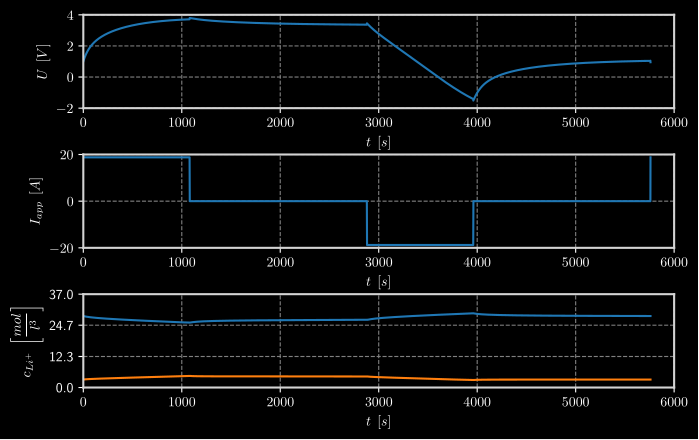

In [43]:
import matplotlib.pyplot as plt
from helpers import set_size

plt.rcParams.update(plot_config)
fig,ax = plt.subplots(3,1, figsize=set_size(490))

# voltage over time
img = ax[0]
img.plot(ts, Us)
img.set_xlabel(r"$t \; \left[ s \right]$")
img.set_ylabel(r"$U \; \left[ V \right]$")
img.set_xlim([np.floor(np.min(ts)/1000)*1000, np.ceil(np.max(ts)/1000)*1000])
img.set_ylim([-2,4])

# applied current over time
img = ax[1]
img.plot(ts, Is)
img.set_xlabel(r"$t \; \left[ s \right]$")
img.set_ylabel(r"$I_{app} \; \left[ A \right]$")
img.set_xlim([np.floor(np.min(ts)/1000)*1000, np.ceil(np.max(ts)/1000)*1000])
img.set_ylim([np.floor(np.min(i_apps)/10)*10, np.ceil(np.max(i_apps)/10)*10])

# applied current over time
img = ax[2]
img.plot(ts, ano_c_surfs)
img.plot(ts, cat_c_surfs)
img.set_xlabel(r"$t \; \left[ s \right]$")
img.set_ylabel(r"$c_{Li^+} \; \left[ \frac{mol}{l^3} \right]$")
img.set_xlim([np.floor(np.min(ts)/1000)*1000, np.ceil(np.max(ts)/1000)*1000])

c_max = np.ceil(stack[2]["c_max"]/1000)
img.set_ylim([0, c_max *  1000])
ylocs = np.round(np.linspace(0, c_max, 4),1)
img.set_yticks(ylocs * 1000, ylocs)

fig.tight_layout(pad=0)
save_plot(plt, 'U(t)&Iapp(t)&c(t)')

fig